In [110]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import (train_test_split,
                                     cross_val_score, KFold, GridSearchCV)
from sklearn.metrics import root_mean_squared_error as RMSE
from sklearn.metrics import r2_score
from IPython.display import SVG
from graphviz import Source
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Machine Learning Models

### Artificial Neural Networks

In [25]:
data = pd.read_csv('final_data.csv', index_col=0)

In [26]:
data = data.drop('Day', axis=1)

In [60]:
data.head(2)

,P,T,Site,Discharge_cms,Area,Month,Year
0,0.0067,9.3245,AboveWoodCamp,4.860850,402.836,6,2018
1,0.1799,9.8528,AboveWoodCamp,4.687956,402.836,6,2018


In [63]:
data =data.reset_index()

In [64]:
encoder = OneHotEncoder(sparse_output = False)
site_encoded = encoder.fit_transform(data[['Site']])
site_encoded_df = pd.DataFrame(site_encoded, columns=encoder.get_feature_names_out(['Site']))
data_encoded = pd.concat([data.drop('Site', axis=1), site_encoded_df],axis=1, join = 'inner')

In [119]:
X = data_encoded.drop('Discharge_cms', axis=1).values
y = data_encoded.Discharge_cms.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [120]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train = x_scaler.fit_transform(X_train)
X_val = x_scaler.transform(X_val)
X_test = x_scaler.transform(X_test)

y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val = y_scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=10,   # Number of epochs to wait for improvement
                               restore_best_weights=True,  # Restore the best model weights after stopping
                               verbose=1)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping], 
    verbose=1
)

Epoch 1/100
418/418 [==============================] - 4s 4ms/step - loss: 0.6500 - mae: 0.4696 - val_loss: 0.4362 - val_mae: 0.3950
Epoch 2/100
418/418 [==============================] - 1s 3ms/step - loss: 0.4426 - mae: 0.3717 - val_loss: 0.3767 - val_mae: 0.3347
Epoch 3/100
418/418 [==============================] - 1s 3ms/step - loss: 0.3853 - mae: 0.3439 - val_loss: 0.3529 - val_mae: 0.3478
Epoch 4/100
418/418 [==============================] - 1s 4ms/step - loss: 0.3348 - mae: 0.3266 - val_loss: 0.2946 - val_mae: 0.2970
Epoch 5/100
418/418 [==============================] - 2s 4ms/step - loss: 0.3075 - mae: 0.3161 - val_loss: 0.2858 - val_mae: 0.3053
Epoch 6/100
418/418 [==============================] - 1s 3ms/step - loss: 0.2880 - mae: 0.3041 - val_loss: 0.2804 - val_mae: 0.3057
Epoch 7/100
418/418 [==============================] - 1s 3ms/step - loss: 0.2710 - mae: 0.2940 - val_loss: 0.2577 - val_mae: 0.2822
Epoch 8/100
418/418 [==============================] - 1s 3ms/step - 

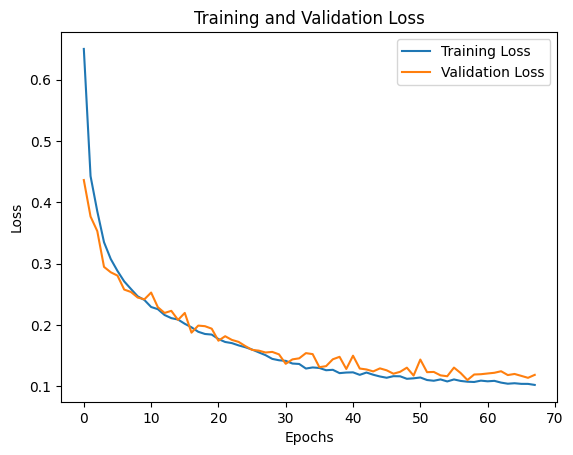

In [73]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [94]:
y_predicted = model.predict(X_test)
y_predicted = y_scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test1 = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

131/131 [==============================] - 0s 2ms/step


In [102]:
Error = RMSE(y_test1, y_predicted)

In [103]:
print(Error)

2.073415711217129


In [108]:
r2 = r2_score(y_test1, y_predicted)

In [109]:
print(r2)

0.8835333302072591


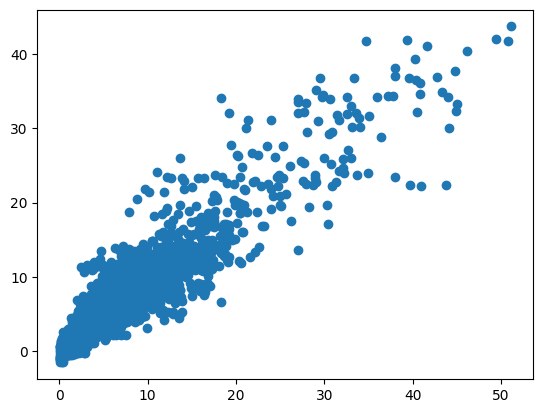

In [98]:
plt.scatter(y_test1, y_predicted)

In [101]:
y_test.mean()

4.653368707721256

In [121]:
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Output layer for regression
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=10,   # Number of epochs to wait for improvement
                               restore_best_weights=True,  # Restore the best model weights after stopping
                               verbose=1)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping], 
    verbose=1
)

Epoch 1/100
418/418 [==============================] - 4s 4ms/step - loss: 0.6013 - mae: 0.4457 - val_loss: 0.4405 - val_mae: 0.3809
Epoch 2/100
418/418 [==============================] - 1s 3ms/step - loss: 0.4395 - mae: 0.3639 - val_loss: 0.4148 - val_mae: 0.3556
Epoch 3/100
418/418 [==============================] - 1s 3ms/step - loss: 0.4029 - mae: 0.3431 - val_loss: 0.3681 - val_mae: 0.3364
Epoch 4/100
418/418 [==============================] - 1s 3ms/step - loss: 0.3624 - mae: 0.3269 - val_loss: 0.3485 - val_mae: 0.3118
Epoch 5/100
418/418 [==============================] - 1s 3ms/step - loss: 0.3279 - mae: 0.3108 - val_loss: 0.3144 - val_mae: 0.3043
Epoch 6/100
418/418 [==============================] - 1s 3ms/step - loss: 0.2932 - mae: 0.2953 - val_loss: 0.2874 - val_mae: 0.2942
Epoch 7/100
418/418 [==============================] - 1s 3ms/step - loss: 0.2683 - mae: 0.2827 - val_loss: 0.2754 - val_mae: 0.2823
Epoch 8/100
418/418 [==============================] - 1s 3ms/step - 

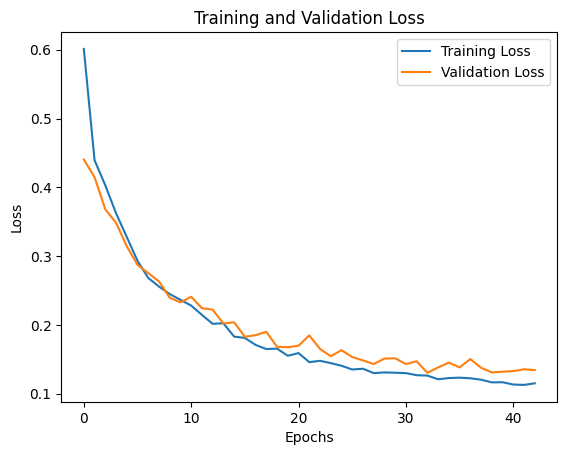

In [124]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [128]:
y_predicted = model.predict(X_test)
y_predicted = y_scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test1 = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
Error = RMSE(y_test1, y_predicted)
print(f'RMSE : {Error}')

131/131 [==============================] - 0s 2ms/step
RMSE : 2.1777910455842853


In [130]:
r2 = r2_score(y_test1, y_predicted)
print(f'R_squared: {r2}')

R_squared: 0.871512374566144


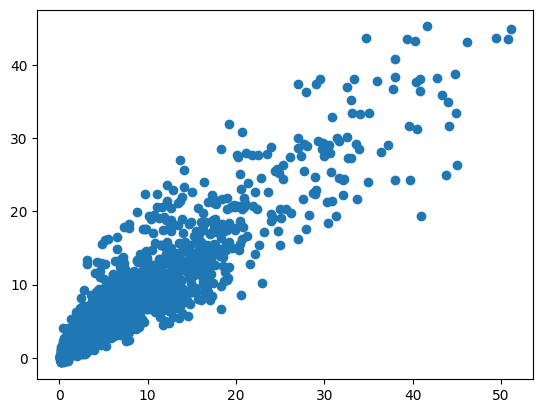

In [131]:
plt.scatter(y_test1, y_predicted)

### Linear Regression

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
data = pd.read_csv('final_data.csv', index_col=0)
data = data.drop('Day', axis=1)
# One-hot encode the 'Site' feature
data = pd.get_dummies(data, columns=["Site"], drop_first=True)

# Define features (X) and target (y)
X = data.drop(columns=["Discharge_cms"])
y = data["Discharge_cms"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Cross-validation scores
cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_rmse = np.sqrt(-cv_scores)

# Fit the model on training data and predict on test data
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Evaluate the model
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

# Output results
{
    "Cross-validation RMSE (mean)": cv_rmse.mean(),
    "Cross-validation RMSE (std)": cv_rmse.std(),
    "Test RMSE": test_rmse,
    "Test r2_score" : test_r2
}

{'Cross-validation RMSE (mean)': 5.366255335627637,
 'Cross-validation RMSE (std)': 0.11687886306210961,
 'Test RMSE': 5.532488987286979,
 'Test r2_score': 0.17077955058865035}

### KNeighborsRegressor

In [149]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Remove the 'Site' feature for KNN
X_knn = data.drop(columns=["Discharge_cms"] + [col for col in data.columns if "Site_" in col])

# Scale the features
scaler = StandardScaler()
X_knn_scaled = scaler.fit_transform(X_knn)

# Train-test split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn_scaled, y, test_size=0.2, random_state=42)

# Initialize the KNN model
knn = KNeighborsRegressor()

# Define a parameter grid for GridSearchCV
param_grid = {
    "n_neighbors": range(3,31,2),
    "weights": ["uniform"],
    "metric": ["euclidean"]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search_knn.fit(X_train_knn, y_train_knn)

# Best model and predictions
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_knn)

# Evaluate the model
test_rmse_knn = np.sqrt(mean_squared_error(y_test_knn, y_pred_knn))
test_r2 = r2_score(y_test_knn, y_pred_knn)
# Print results
print("Best Parameters:", grid_search_knn.best_params_)
print("Test RMSE:", test_rmse_knn)
print("Test Rsquared:", test_r2)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Test RMSE: 2.536560538864849
Test Rsquared: 0.825691184691344


### RandomForestRegressor

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data (use the encoded dataset from earlier)
X_rf = data.drop(columns=["Discharge_cms"])
y_rf = data["Discharge_cms"]

# Train-test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define a parameter grid for GridSearchCV
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 15, 20, 25],}

# Perform GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search_rf.fit(X_train_rf, y_train_rf)

# Best model and predictions
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_rf)

# Evaluate the model
test_rmse_rf = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))
test_rmse_r2 = r2_score(y_test_rf, y_pred_rf)
# Print results
print("Best Parameters:", grid_search_rf.best_params_)
print("Test RMSE:", test_rmse_rf)
print("Test R2 score:", test_rmse_r2)

Best Parameters: {'max_depth': 15, 'n_estimators': 200}
Test RMSE: 1.756258925015841
Test R2 score: 0.9164385483585386


### XGBRegressor

In [153]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data (use the encoded dataset from earlier)
X_xgb = data.drop(columns=["Discharge_cms"])
y_xgb = data["Discharge_cms"]

# Train-test split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# Define a parameter grid for GridSearchCV
param_grid_xgb = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search_xgb.fit(X_train_xgb, y_train_xgb)

# Best model and predictions
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_xgb)

# Evaluate the model
test_rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))
test_r2_xgb = r2_score(y_test_xgb, y_pred_xgb)
# Print results
print("Best Parameters:", grid_search_xgb.best_params_)
print("Test RMSE:", test_rmse_xgb)
print("Test R2:", test_r2_xgb)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Test RMSE: 1.653943672973556
Test R2: 0.9258911084475292


### SVR
#### Running this block of code will take considerable amount of time

In [161]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare the data
X_svr = data.drop(columns=["Discharge_cms"])
y_svr = data["Discharge_cms"]

# Scale the features
scaler = StandardScaler()
X_svr_scaled = scaler.fit_transform(X_svr)

# Train-test split
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr_scaled, y_svr, test_size=0.2, random_state=42)

# Initialize the SVR model
svr = SVR()

# Define a parameter grid for GridSearchCV
param_grid_svr = [
    {'C': [1, 10, 100,], 'gamma': [1, 0.1, 0.01,], 'kernel': ['rbf']},
    {'C': [1, 10, 100,], 'degree': [1, 2, 3], 'kernel': ['poly']}]

# Perform GridSearchCV for hyperparameter tuning
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring="neg_mean_squared_error",verbose=100)
grid_search_svr.fit(X_train_svr, y_train_svr)

# Best model and predictions
best_svr = grid_search_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test_svr)

# Evaluate the model
test_rmse_svr = np.sqrt(mean_squared_error(y_test_svr, y_pred_svr))
test_r2_svr = r2_score(y_test_svr, y_pred_svr)
# Print results
print("Best Parameters:", grid_search_svr.best_params_)
print("Test RMSE:", test_rmse_svr)
print("Test R2:", test_r2_svr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START C=1, gamma=1, kernel=rbf...................................
[CV 1/5; 1/18] END ..C=1, gamma=1, kernel=rbf;, score=-12.589 total time=  16.2s
[CV 2/5; 1/18] START C=1, gamma=1, kernel=rbf...................................
[CV 2/5; 1/18] END ..C=1, gamma=1, kernel=rbf;, score=-14.898 total time=  16.1s
[CV 3/5; 1/18] START C=1, gamma=1, kernel=rbf...................................
[CV 3/5; 1/18] END .C=1, gamma=1, kernel=rbf;, score=-13.568 total time=449.4min
[CV 4/5; 1/18] START C=1, gamma=1, kernel=rbf...................................
[CV 4/5; 1/18] END ..C=1, gamma=1, kernel=rbf;, score=-12.459 total time=  35.0s
[CV 5/5; 1/18] START C=1, gamma=1, kernel=rbf...................................
[CV 5/5; 1/18] END ..C=1, gamma=1, kernel=rbf;, score=-14.902 total time=  29.1s
[CV 1/5; 2/18] START C=1, gamma=0.1, kernel=rbf.................................
[CV 1/5; 2/18] END C=1, gamma=0.1, kernel=rbf;, 

### Feature Importances

#### Random Forest Feature Importance

In [193]:
imp = list(best_xgb.feature_importances_ [:5])
site_imp = sum(best_xgb.feature_importances_ [5:])
imp.append(site_imp)

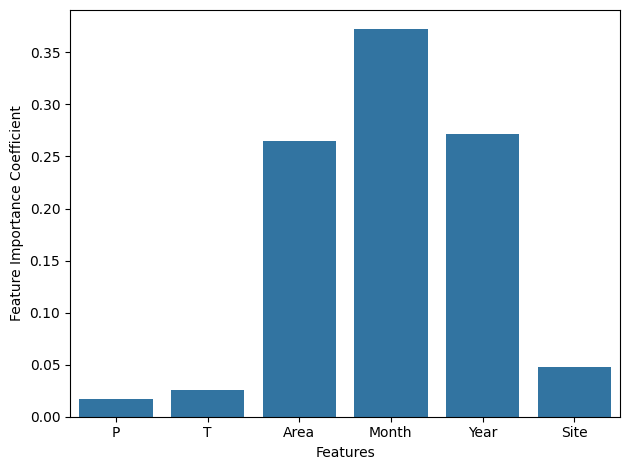

In [195]:
sns.barplot(imp)
plt.xticks(ticks = range(0,6),labels=['P','T','Area','Month','Year','Site'])
plt.ylabel('Feature Importance Coefficient')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [196]:
from sklearn.inspection import permutation_importance
result = permutation_importance(best_xgb, X_test_xgb, y_test_xgb, scoring='r2', random_state=42)

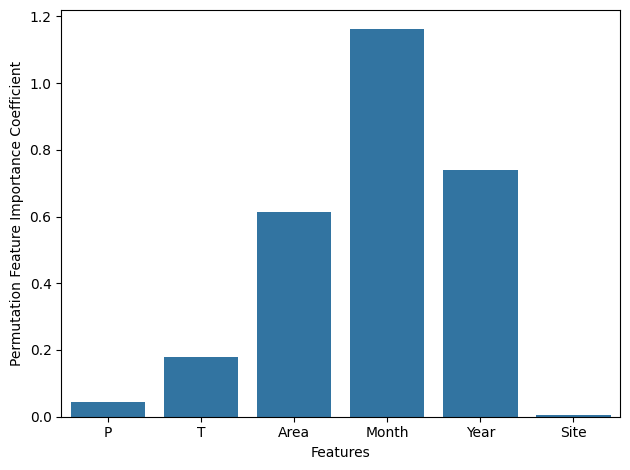

In [202]:
imp = list(result['importances_mean'][0:5])
site_imp = sum(result['importances_mean'][5:])
imp.append(site_imp)
sns.barplot(imp)
plt.xticks(ticks = range(0,6),labels=['P','T','Area','Month','Year','Site'])
plt.ylabel('Permutation Feature Importance Coefficient')
plt.xlabel('Features')
plt.tight_layout()
plt.show()